# COUNTER ANALYSIS

First we ASSEMBLE it, after that its been LABELED. Then its PACKAGED and these going into a CARTON. At last the Cartons get PALLETIZED   
It goes from Assembly (Harro Hoefliger) to Labeler (Krones) to Packaging (Schubert Verpacker) to Cartoner (Pester Umverpacker) to Palletizer (Pester)


|IP_TAG Name   |Machine|German|Description|Alarm File location|
|--------------|-------|------|-------------|-------------------| 
|36630901_CNTR_GOOD|Assembly|Montage|pens rejected between Assembly and Labeler|Y:\E00_Solostar\E6_Assembly_Line_6\E63_Montage\CSV|   


In [4]:
import configparser

Config = configparser.ConfigParser()

Config.read('settings.cfg')

def ConfigSectionMap(section):
    dict1 = {}
    options = Config.options(section)
    for option in options:
        try:
            dict1[option] = Config.get(section, option)
            if dict1[option] == -1:
                DebugPrint("skip: %s" % option)
        except:
            print("exception on %s!" % option)
            dict1[option] = None
    return dict1



dir_sanofi_share = ConfigSectionMap("SectionOne")['sanofi']
dir_local = ConfigSectionMap("SectionOne")['local']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))


dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/


In [293]:
import pandas as pd
import numpy as np
import os
from glob import iglob

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [294]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

Files = []
df = []
# function to read in files we need into a generic df
def create_df_from_file(indir, infolder, infilesearch):
    folder = infolder
    path = os.path.join(indir, folder)


    df = []
    df_created = pd.DataFrame()

    # do a recursive search for the files now we have multiple dirs
    for filename in iglob(path + '/**/*' + infilesearch + '*', recursive=True):
        df = pd.read_csv(filename)
        df_created = df_created.append(df)

    return df_created


In [295]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

# call function with dir, folder, search criteria to find files, name of dataframe to create
# these are the bad pen counts
df_CNTRB = create_df_from_file(dir_sanofi_share, folder, "_CNTRB")
# df_CNTRB = df_CNTRB[['Name','IP_TREND_TIME','IP_TREND_VALUE']]
df_CNTRB

,Name,IP_TREND_TIME,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS
0,36630901_CNTRB,19-AUG-21 20:16:29.9,5893,Good,Good
1,36630901_CNTRB,19-AUG-21 20:15:14.2,5892,Good,Good
2,36630901_CNTRB,19-AUG-21 20:15:09.0,5891,Good,Good
3,36630901_CNTRB,19-AUG-21 20:13:22.3,5890,Good,Good
4,36630901_CNTRB,19-AUG-21 20:12:07.3,5889,Good,Good
...,...,...,...,...,...
6195,36670901_CNTRB_OCROCV,02-SEP-21 09:55:03.0,1230,Good,Good
6196,36670901_CNTRB_OCROCV,02-SEP-21 09:45:03.3,1230,Good,Good
6197,36670901_CNTRB_OCROCV,02-SEP-21 09:35:03.9,1230,Good,Good
6198,36670901_CNTRB_OCROCV,02-SEP-21 09:34:30.1,1229,Good,Good


In [296]:
# convert dates to datetime format
df_CNTRB['IP_TREND_TIME'] = pd.to_datetime(df_CNTRB['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')
df_CNTRB.set_index('IP_TREND_TIME', inplace=True)


In [297]:
df_CNTRB['Machine'] = ''
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36630901'), 'Machine'] = 'Assembly'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36640901'), 'Machine'] = 'Labeler'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36650901'), 'Machine'] = 'Packaging'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df_CNTRB.loc[df_CNTRB['Name'].str.contains('36680902'), 'Machine'] = 'Palletizer'


In [298]:
df_CNTRB[df_CNTRB.Machine == 'Assembly'].Name.unique()

array(['36630901_CNTRB', '36630901_CNTRB_PCS', '36630901_CNTRB_PRO',
       '36630901_CNTRB_ST1', '36630901_CNTRB_ST10', '36630901_CNTRB_ST11',
       '36630901_CNTRB_ST12', '36630901_CNTRB_ST13',
       '36630901_CNTRB_ST14', '36630901_CNTRB_ST15',
       '36630901_CNTRB_ST16', '36630901_CNTRB_ST17', '36630901_CNTRB_ST2',
       '36630901_CNTRB_ST3', '36630901_CNTRB_ST4', '36630901_CNTRB_ST5',
       '36630901_CNTRB_ST6', '36630901_CNTRB_ST7', '36630901_CNTRB_ST8',
       '36630901_CNTRB_ST9', '36630901_CNTRB_ZA_PCS',
       '36630901_CNTRB_ZA_PCS1', '36630901_CNTRB_ZA_PCS2',
       '36630901_CNTRB_ZA_PCS3', '36630901_CNTRB_ZA_PCS4',
       '36630901_CNTRB_ZA_PCS5', '36630901_CNTRB_ZA_PCS6',
       '36630901_CNTRB_ZA_PCS7', '36630901_CNTRB_ZA_REL'], dtype=object)

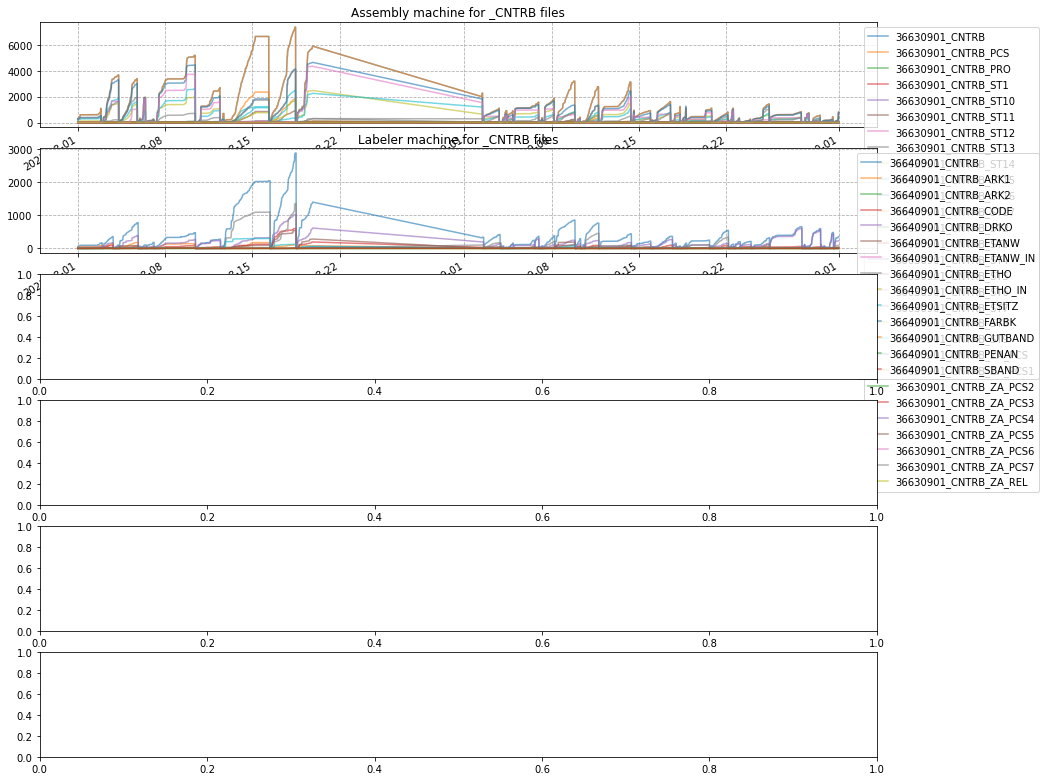

In [299]:
machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

i=0

fig, axs = plt.subplots(len(machines)+1, 1, figsize=(15, 15))

for x in machines:
    name_filter = '_CNTRB'
    names = df_CNTRB[(df_CNTRB.Name.str.contains(name_filter)) & (df_CNTRB.Machine == x)].Name.unique()
    # only get files with a count
    # names = df_CNTRB['Name'][df_CNTRB.IP_TREND_VALUE > 0].unique()

    for n in names:
        df_CNTRB['IP_TREND_VALUE'][df_CNTRB.Name == n].plot(label=n, ax=axs[i], alpha=0.6)
        # plt.yscale('log')
        axs[i].grid(True,which="both", linestyle='--')
        axs[i].set_title('{} machine for {} files'.format(x, name_filter))
        axs[i].legend(loc='upper right', bbox_to_anchor=(1.20, 1.0), fancybox=True)

    i+=1

In [466]:
# read IP21 SPEED files for AL6 packaging machines
folder = 'IP21_data'

df_CNTR_GOOD = create_df_from_file(dir_sanofi_share, folder, "_CNTR_GOOD")
df_CNTR_GOOD['IP_TREND_TIME'] = pd.to_datetime(df_CNTR_GOOD['IP_TREND_TIME'], format='%d-%b-%y %H:%M:%S.%f')


In [468]:
df_CNTR_GOOD['Machine'] = ''
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36630901'), 'Machine'] = 'Assembly'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36640901'), 'Machine'] = 'Labeler'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36650901'), 'Machine'] = 'Packaging'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36680902'), 'Machine'] = 'Palletizer'
df_CNTR_GOOD.loc[df_CNTR_GOOD['Name'].str.contains('36670901'), 'Machine'] = 'Packaging2'


df_CNTR_GOOD

,Name,IP_TREND_TIME,IP_TREND_VALUE,IP_TREND_QLEVEL,IP_TREND_QSTATUS,Machine
0,36630901_CNTR_GOOD,2021-08-19 20:19:35.500,415611,Good,Good,Assembly
1,36630901_CNTR_GOOD,2021-08-19 20:19:34.500,415601,Good,Good,Assembly
2,36630901_CNTR_GOOD,2021-08-19 20:19:33.500,415595,Good,Good,Assembly
3,36630901_CNTR_GOOD,2021-08-19 20:19:32.500,415585,Good,Good,Assembly
4,36630901_CNTR_GOOD,2021-08-19 20:19:30.400,415579,Good,Good,Assembly
...,...,...,...,...,...,...
45664,36680902_CNTR_GOOD,2021-09-02 09:34:52.700,3544,Good,Good,Palletizer
45665,36680902_CNTR_GOOD,2021-09-02 09:34:33.200,3543,Good,Good,Palletizer
45666,36680902_CNTR_GOOD,2021-09-02 09:34:15.700,3542,Good,Good,Palletizer
45667,36680902_CNTR_GOOD,2021-09-02 09:33:57.300,3541,Good,Good,Palletizer


In [474]:
df_CNTR_GOOD.sort_values(by = ['Name','IP_TREND_TIME'], inplace=True)
df_CNTR_GOOD['counter_diff'] = df_CNTR_GOOD.groupby('Name')['IP_TREND_VALUE'].diff()
df_CNTR_GOOD['counter_diff'].loc[df_CNTR_GOOD.IP_TREND_VALUE < 0] = 0
df_CNTR_GOOD['counter_diff'][(df_CNTR_GOOD.counter_diff < 0) & (df_CNTR_GOOD.IP_TREND_VALUE == 0)] = 0

C:\Users\mark_\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-474-c740923297be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CNTR_GOOD['counter_diff'][(df_CNTR_GOOD.counter_diff < 0) & (df_CNTR_GOOD.IP_TREND_VALUE == 0)] = 0


In [475]:
df_CNTR_GOOD.reset_index(inplace=True)
df_CNTR_GOOD.sort_values(['Name','IP_TREND_TIME'], inplace=True)
df_CNTR_GOOD['time_diff'] = df_CNTR_GOOD.groupby('Name')['IP_TREND_TIME'].diff().dt.total_seconds()
df_CNTR_GOOD.set_index('IP_TREND_TIME', inplace=True)

In [476]:
df_CNTR_GOOD['units_per_sec'] = df_CNTR_GOOD['counter_diff'] / df_CNTR_GOOD['time_diff'] 

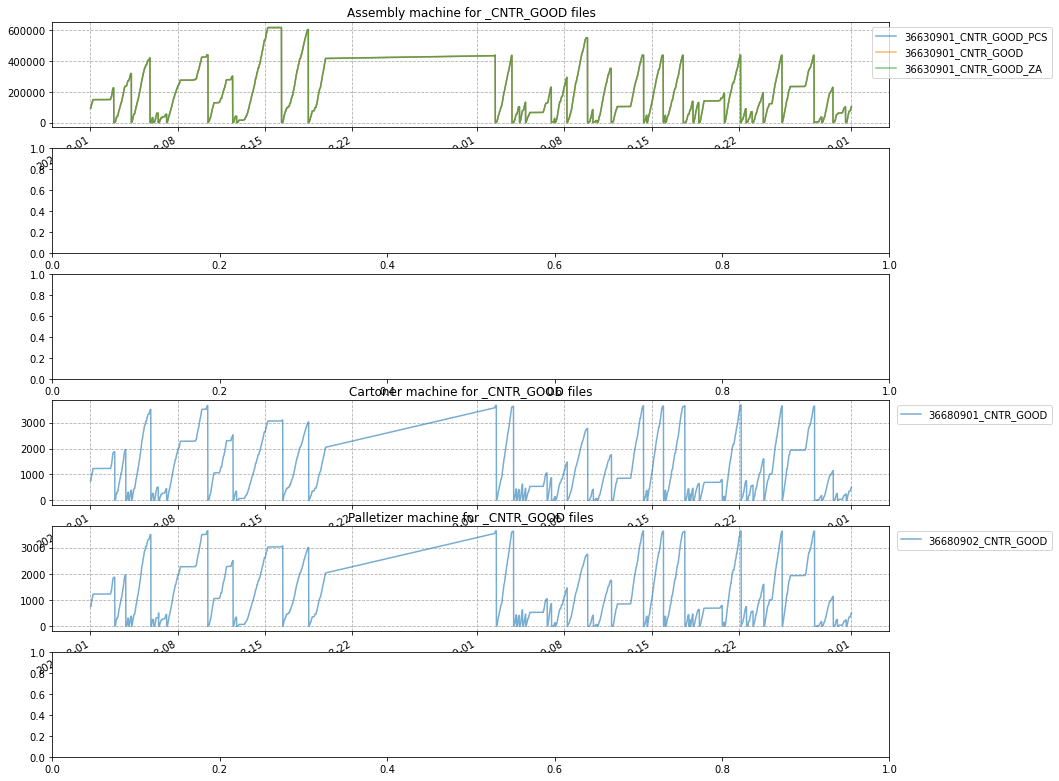

In [578]:
machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

i=0

fig, axs = plt.subplots(len(machines)+1, 1, figsize=(15, 15))

for x in machines:
    name_filter = '_CNTR_GOOD'
    names = df_CNTR_GOOD[(df_CNTR_GOOD.Name.str.contains(name_filter)) & (df_CNTR_GOOD.Machine == x)].Name.unique()
    # only get files with a count
    # names = df_CNTRB['Name'][df_CNTRB.IP_TREND_VALUE > 0].unique()

    for n in names:
        df_CNTR_GOOD['IP_TREND_VALUE'][df_CNTR_GOOD.Name == n].plot(label=n, ax=axs[i], alpha=0.6)
        # plt.yscale('log')
        axs[i].grid(True,which="both", linestyle='--')
        axs[i].set_title('{} machine for {} files'.format(x, name_filter))
        axs[i].legend(loc='upper right', bbox_to_anchor=(1.20, 1.0), fancybox=True)

    i+=1

In [566]:
# group[group.counter_diff > 20000]
group.loc['2021-08-02 18:00:00':'2021-08-02 20:00:00'].head(75)

,Machine,Name,counter_diff
IP_TREND_TIME,,,
2021-08-02 18:00:00,Assembly,36630901_CNTR_GOOD,23030.0
2021-08-02 19:00:00,Assembly,36630901_CNTR_GOOD,5339.0
2021-08-02 20:00:00,Assembly,36630901_CNTR_GOOD,105.0
2021-08-02 18:00:00,Assembly,36630901_CNTR_GOOD_PCS,23027.0
2021-08-02 19:00:00,Assembly,36630901_CNTR_GOOD_PCS,5313.0
2021-08-02 20:00:00,Assembly,36630901_CNTR_GOOD_PCS,0.0
2021-08-02 18:00:00,Assembly,36630901_CNTR_GOOD_ZA,23038.0
2021-08-02 19:00:00,Assembly,36630901_CNTR_GOOD_ZA,4843.0
2021-08-02 20:00:00,Assembly,36630901_CNTR_GOOD_ZA,0.0


In [523]:
df_CNTR_GOOD.sort_values(['Machine','IP_TREND_TIME'], inplace=True)
group = df_CNTR_GOOD.groupby(['Machine','Name',pd.Grouper(freq=freq)]).sum().reset_index()


In [536]:
all = df_CNTR_GOOD.append(df_CNTRB)
group = all.groupby(['Machine','Name',pd.Grouper(freq=freq)]).sum().reset_index()
pivot = group.pivot(index='IP_TREND_TIME', columns='Name', values='counter_diff')

In [278]:
df['Machine'] = ''
df.loc[df['Name_x'].str.contains('36630901'), 'Machine'] = 'Assembly'
df.loc[df['Name_x'].str.contains('36640901'), 'Machine'] = 'Labeler'
df.loc[df['Name_x'].str.contains('36650901'), 'Machine'] = 'Packaging'
df.loc[df['Name_x'].str.contains('36680901'), 'Machine'] = 'Cartoner'
df.loc[df['Name_x'].str.contains('36680902'), 'Machine'] = 'Palletizer'
df.loc[df['Name_x'].str.contains('36670901'), 'Machine'] = 'Packaging2'

<AxesSubplot:xlabel='IP_TREND_TIME'>

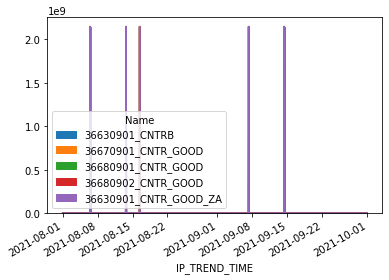

In [574]:
pivot2 = pivot[['36630901_CNTRB','36670901_CNTR_GOOD','36680901_CNTR_GOOD','36680902_CNTR_GOOD','36630901_CNTR_GOOD_ZA']]
pivot2.plot.area()

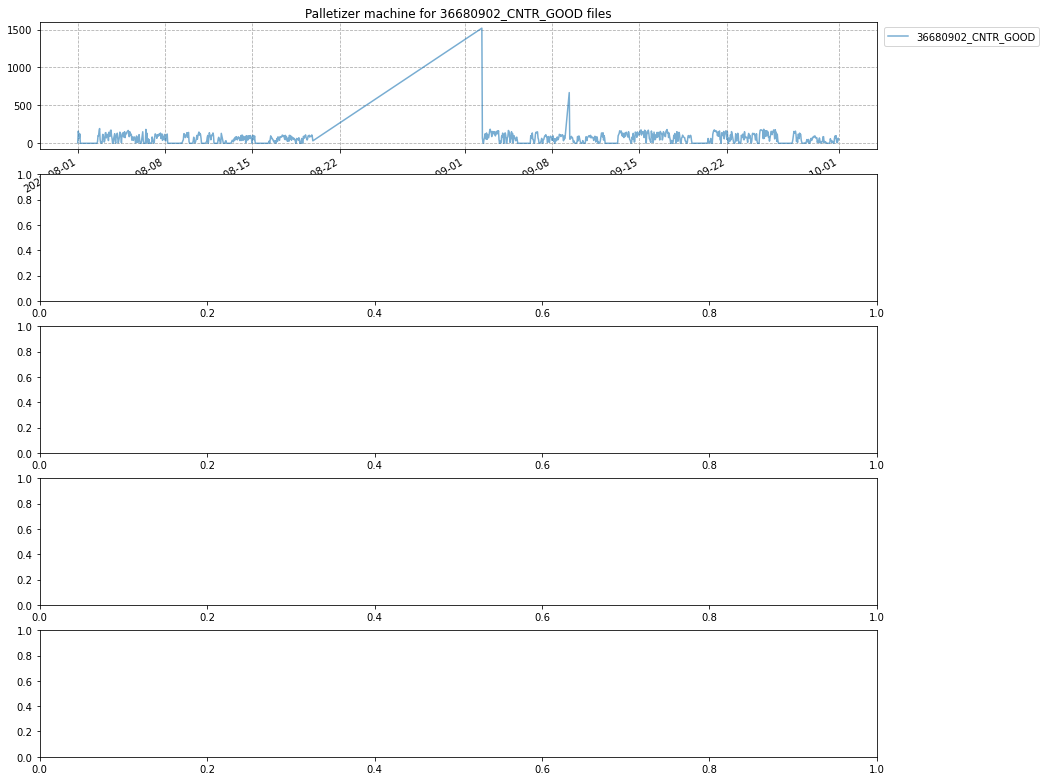

In [573]:
freq='1h'

machines = ['Assembly', 'Labeler', 'Packaging', 'Cartoner', 'Palletizer']

fig, axs = plt.subplots(len(machines), 1, figsize=(15, 15))

i=0

for n in names:
    pivot2[n].plot(label=n, ax=axs[i], alpha=0.6)
    # plt.yscale('log')
    axs[i].grid(True,which="both", linestyle='--')
    axs[i].set_title('{} machine for {} files'.format(x, n))
    axs[i].legend(loc='upper right', bbox_to_anchor=(1.20, 1.0), fancybox=True)


    i+=1